# Findings : The investigation how to increase followers on Linkedin Profile:


This is the dataset of employers'profile on Linkedin pulled out from Kaggle. 

Helpful Fun facts :
- Top 10 Industries have Linked profiles : Consumer Goods, Automotive, Information Technology & Services,Pharmaceuticals,Telecommunications,Internet,Computer Software, Retail,Industrial Automation,Financial Services 
=> Linkedin can target this industries first to promote employer subscriptions
- San Francisco and San Ramon are the cities have more companies have Linkedin followers 
=> Linkedin can target these cities first to promote employer subscriptions


Findings :
- By using KNN, logistic regression and SVM models, the factors that company's industry belongs to top 10 above,using hashtags that has high followers, posting with media (images, videos) will likely to affect followers number on Linkedin. Numbers of comments and reactions do not lead to an increase in followers

In [247]:
import pandas as pd

In [248]:
df = pd.read_csv('company_data2.csv',index_col='name')

In [444]:
df.head()

,headline,location,followers,connections,about,time_spent,content,num_hashtags,hashtag_followers,reactions,comments,media
name,,,,,,,,,,,,
Dell Technologies,Information Technology & Services,"Round Rock, Texas",3597845.0,"194,140",Dell Technologies is a unique family of busine...,1 week ago,#ICYMI check out the keynote replay from the ...,2,0,1217,577,1.0
Dell Technologies,Information Technology & Services,"Round Rock, Texas",3597845.0,"194,140",Dell Technologies is a unique family of busine...,22 hours ago,"From our family to yours, we wish you four sea...",0,0,195,2,1.0
Dell Technologies,Information Technology & Services,"Round Rock, Texas",3597845.0,"194,140",Dell Technologies is a unique family of busine...,2 days ago,#5G will revolutionize food production — soil...,3,0,250,6,1.0
Dell Technologies,Information Technology & Services,"Round Rock, Texas",3597845.0,"194,140",Dell Technologies is a unique family of busine...,1 day ago,Imagine the future of work as better connected...,1,0,167,3,1.0
Dell Technologies,Information Technology & Services,"Round Rock, Texas",3597845.0,"194,140",Dell Technologies is a unique family of busine...,1 day ago,Discover how intelligent devices are digitizin...,0,0,178,0,1.0


In [250]:
df.columns

Index(['Unnamed: 0', 'headline', 'location', 'followers', 'connections',
       'about', 'time_spent', 'content', 'content_links', 'media_type',
       'media_urls', 'num_hashtags', 'hashtag_followers', 'hashtags',
       'reactions', 'comments', 'views', 'votes'],
      dtype='object')

In [251]:
df.loc[df['media_type']=='video','media']=0

In [252]:
df.loc[df['media_type']=='video','media']=1

In [253]:
df.drop(['content_links','media_urls','hashtags','media_type','views','votes','Unnamed: 0'],axis = 1, inplace=True)

In [255]:
df.dropna(axis=0,how='any',inplace=True)

In [445]:
dumdf = pd.get_dummies(df,columns=['location','headline'])
dumdf.head()

,followers,connections,about,time_spent,content,num_hashtags,hashtag_followers,reactions,comments,media,...,headline_Information Technology & Services,headline_Insurance,headline_Internet,headline_Machinery,headline_Oil & Energy,headline_Pharmaceuticals,headline_Restaurants,headline_Retail,headline_Telecommunications,headline_Utilities
name,,,,,,,,,,,,,,,,,,,,,
Dell Technologies,3597845.0,"194,140",Dell Technologies is a unique family of busine...,1 week ago,#ICYMI check out the keynote replay from the ...,2,0,1217,577,1.0,...,1,0,0,0,0,0,0,0,0,0
Dell Technologies,3597845.0,"194,140",Dell Technologies is a unique family of busine...,22 hours ago,"From our family to yours, we wish you four sea...",0,0,195,2,1.0,...,1,0,0,0,0,0,0,0,0,0
Dell Technologies,3597845.0,"194,140",Dell Technologies is a unique family of busine...,2 days ago,#5G will revolutionize food production — soil...,3,0,250,6,1.0,...,1,0,0,0,0,0,0,0,0,0
Dell Technologies,3597845.0,"194,140",Dell Technologies is a unique family of busine...,1 day ago,Imagine the future of work as better connected...,1,0,167,3,1.0,...,1,0,0,0,0,0,0,0,0,0
Dell Technologies,3597845.0,"194,140",Dell Technologies is a unique family of busine...,1 day ago,Discover how intelligent devices are digitizin...,0,0,178,0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [257]:
dumdf.columns

Index(['followers', 'connections', 'about', 'time_spent', 'content',
       'num_hashtags', 'hashtag_followers', 'reactions', 'comments', 'media',
       'location_Amsterdam, Noord-Holland', 'location_Atlanta, GA',
       'location_Bellevue, WA', 'location_Blackfriars, London',
       'location_Bloomfield, CT', 'location_Brookfield, Wisconsin',
       'location_Cambridge, MA', 'location_Charlotte, North Carolina',
       'location_Chicago, IL', 'location_Chicago, Illinois',
       'location_Cincinnati, Ohio', 'location_Columbus, GA',
       'location_Dallas, TX', 'location_Darmstadt',
       'location_Dearborn, Michigan', 'location_Deerfield, IL',
       'location_Irvine, CA', 'location_Kolkata, West Bengal',
       'location_London', 'location_Moline, IL', 'location_Munich',
       'location_New York, NY', 'location_New York, New York',
       'location_Palm Beach Gardens, Florida', 'location_Palo Alto, CA',
       'location_Redwood City, CA', 'location_Richfield, Minnesota',
       '

In [259]:
df.describe()

,followers,num_hashtags,hashtag_followers,reactions,comments,media
count,3.317000e+03,3317.000000,3317.0,3317.000000,3317.000000,3317.0
mean,2.316958e+06,1.876696,0.0,524.965933,22.503768,1.0
std,2.338681e+06,1.839502,0.0,1006.766953,108.631754,0.0
min,6.468600e+04,0.000000,0.0,0.000000,0.000000,1.0
25%,5.500790e+05,1.000000,0.0,114.000000,1.000000,1.0
50%,1.796631e+06,1.000000,0.0,225.000000,3.000000,1.0
75%,3.293276e+06,3.000000,0.0,503.000000,11.000000,1.0
max,1.298779e+07,19.000000,0.0,17125.000000,1966.000000,1.0


## Company has the most followers on Linkedn in United States 

In [187]:
df.sort_values(by="followers",ascending = True).head(1)

,headline,location,followers,connections,about,time_spent,content,num_hashtags,hashtag_followers,reactions,comments,media
name,,,,,,,,,,,,
PACCAR,Automotive,"Bellevue, WA",64686.0,"3,840",PACCAR is a global technology leader in the de...,11 months ago,https://lnkd.in/gnS-d5v,0,0,89,1,1.0


# Company has the most followers on Linkedin in California

In [70]:
california = df[df['location'].str.contains("CA")]

In [71]:
california.sort_values(by="followers",ascending = True).head(1)

,headline,location,followers,connections,about,time_spent,content,num_hashtags,hashtag_followers,reactions,comments,media
name,,,,,,,,,,,,
Kia Motors America,Automotive,"Irvine, CA",91939.0,"2,899","Kia Motors America is headquartered in Irvine,...",5 months ago,"Emmy, strap in. We’re going for a ride. Kia is...",0,0,168,6,1.0


## Favorite Industry on Linkedin

In [72]:
industry = df['headline'].value_counts()
industry

Consumer Goods                           406
Automotive                               406
Information Technology & Services        389
Pharmaceuticals                          307
Telecommunications                       261
Internet                                 210
Computer Software                        192
Retail                                   173
Industrial Automation                    160
Financial Services                       157
Health, Wellness & Fitness               125
Biotechnology                            101
Machinery                                 94
Entertainment                             58
Restaurants                               47
Aviation & Aerospace                      44
Insurance                                 38
Computer Games                            35
Oil & Energy                              34
Utilities                                 24
Electrical & Electronic Manufacturing     24
Building Materials                        21
Hospital &

In [430]:
df.groupby(by='headline').mean()

,followers,num_hashtags,hashtag_followers,reactions,comments,media
headline,,,,,,
Automotive,1.467664e+06,2.571429,0.0,1223.975369,42.635468,1.0
Aviation & Aerospace,2.225253e+06,0.681818,0.0,2695.295455,65.318182,1.0
Biotechnology,4.692530e+05,3.405941,0.0,355.376238,3.148515,1.0
Building Materials,9.954800e+04,0.523810,0.0,366.619048,5.238095,1.0
Computer Games,7.449760e+05,1.571429,0.0,546.742857,17.657143,1.0
Computer Software,2.085327e+06,0.552083,0.0,184.708333,11.572917,1.0
Consumer Goods,4.458669e+06,2.295567,0.0,567.344828,40.088670,1.0
Electrical & Electronic Manufacturing,1.820788e+06,0.500000,0.0,1143.375000,25.000000,1.0
Entertainment,8.105000e+04,1.500000,0.0,121.706897,2.551724,1.0


In [74]:
industry.describe()

count     23.000000
mean     144.217391
std      130.357186
min       11.000000
25%       36.500000
50%      101.000000
75%      201.000000
max      406.000000
Name: headline, dtype: float64

In [75]:
industrylist = [['Consumer Goods',406],
['Automotive',406],
['Information Technology & Services',389],
['Pharmaceuticals',307],
['Telecommunications',261],
['Internet',210],
['Computer Software',192],
['Retail',173],
['Industrial Automation',160],
['Financial Services',157],
['Health, Wellness & Fitness',125],
['Biotechnology',101],
['Machinery',94],
['Entertainment',58],
['Restaurants',47],
['Aviation & Aerospace',44],
['Insurance',38],
['Computer Games',35],
['Oil & Energy',34],
['Utilities',24],
['Electrical & Electronic Manufacturing',24],
['Building Materials',21],
['Hospital & Health Care',11]]

In [76]:
industrydf = pd.DataFrame(industrylist, columns = ['Industry','Quantity'])

In [77]:
industrydf

,Industry,Quantity
0,Consumer Goods,406
1,Automotive,406
2,Information Technology & Services,389
3,Pharmaceuticals,307
4,Telecommunications,261
5,Internet,210
6,Computer Software,192
7,Retail,173
8,Industrial Automation,160
9,Financial Services,157


In [78]:
x = industrydf['Industry']
y = industrydf['Quantity']

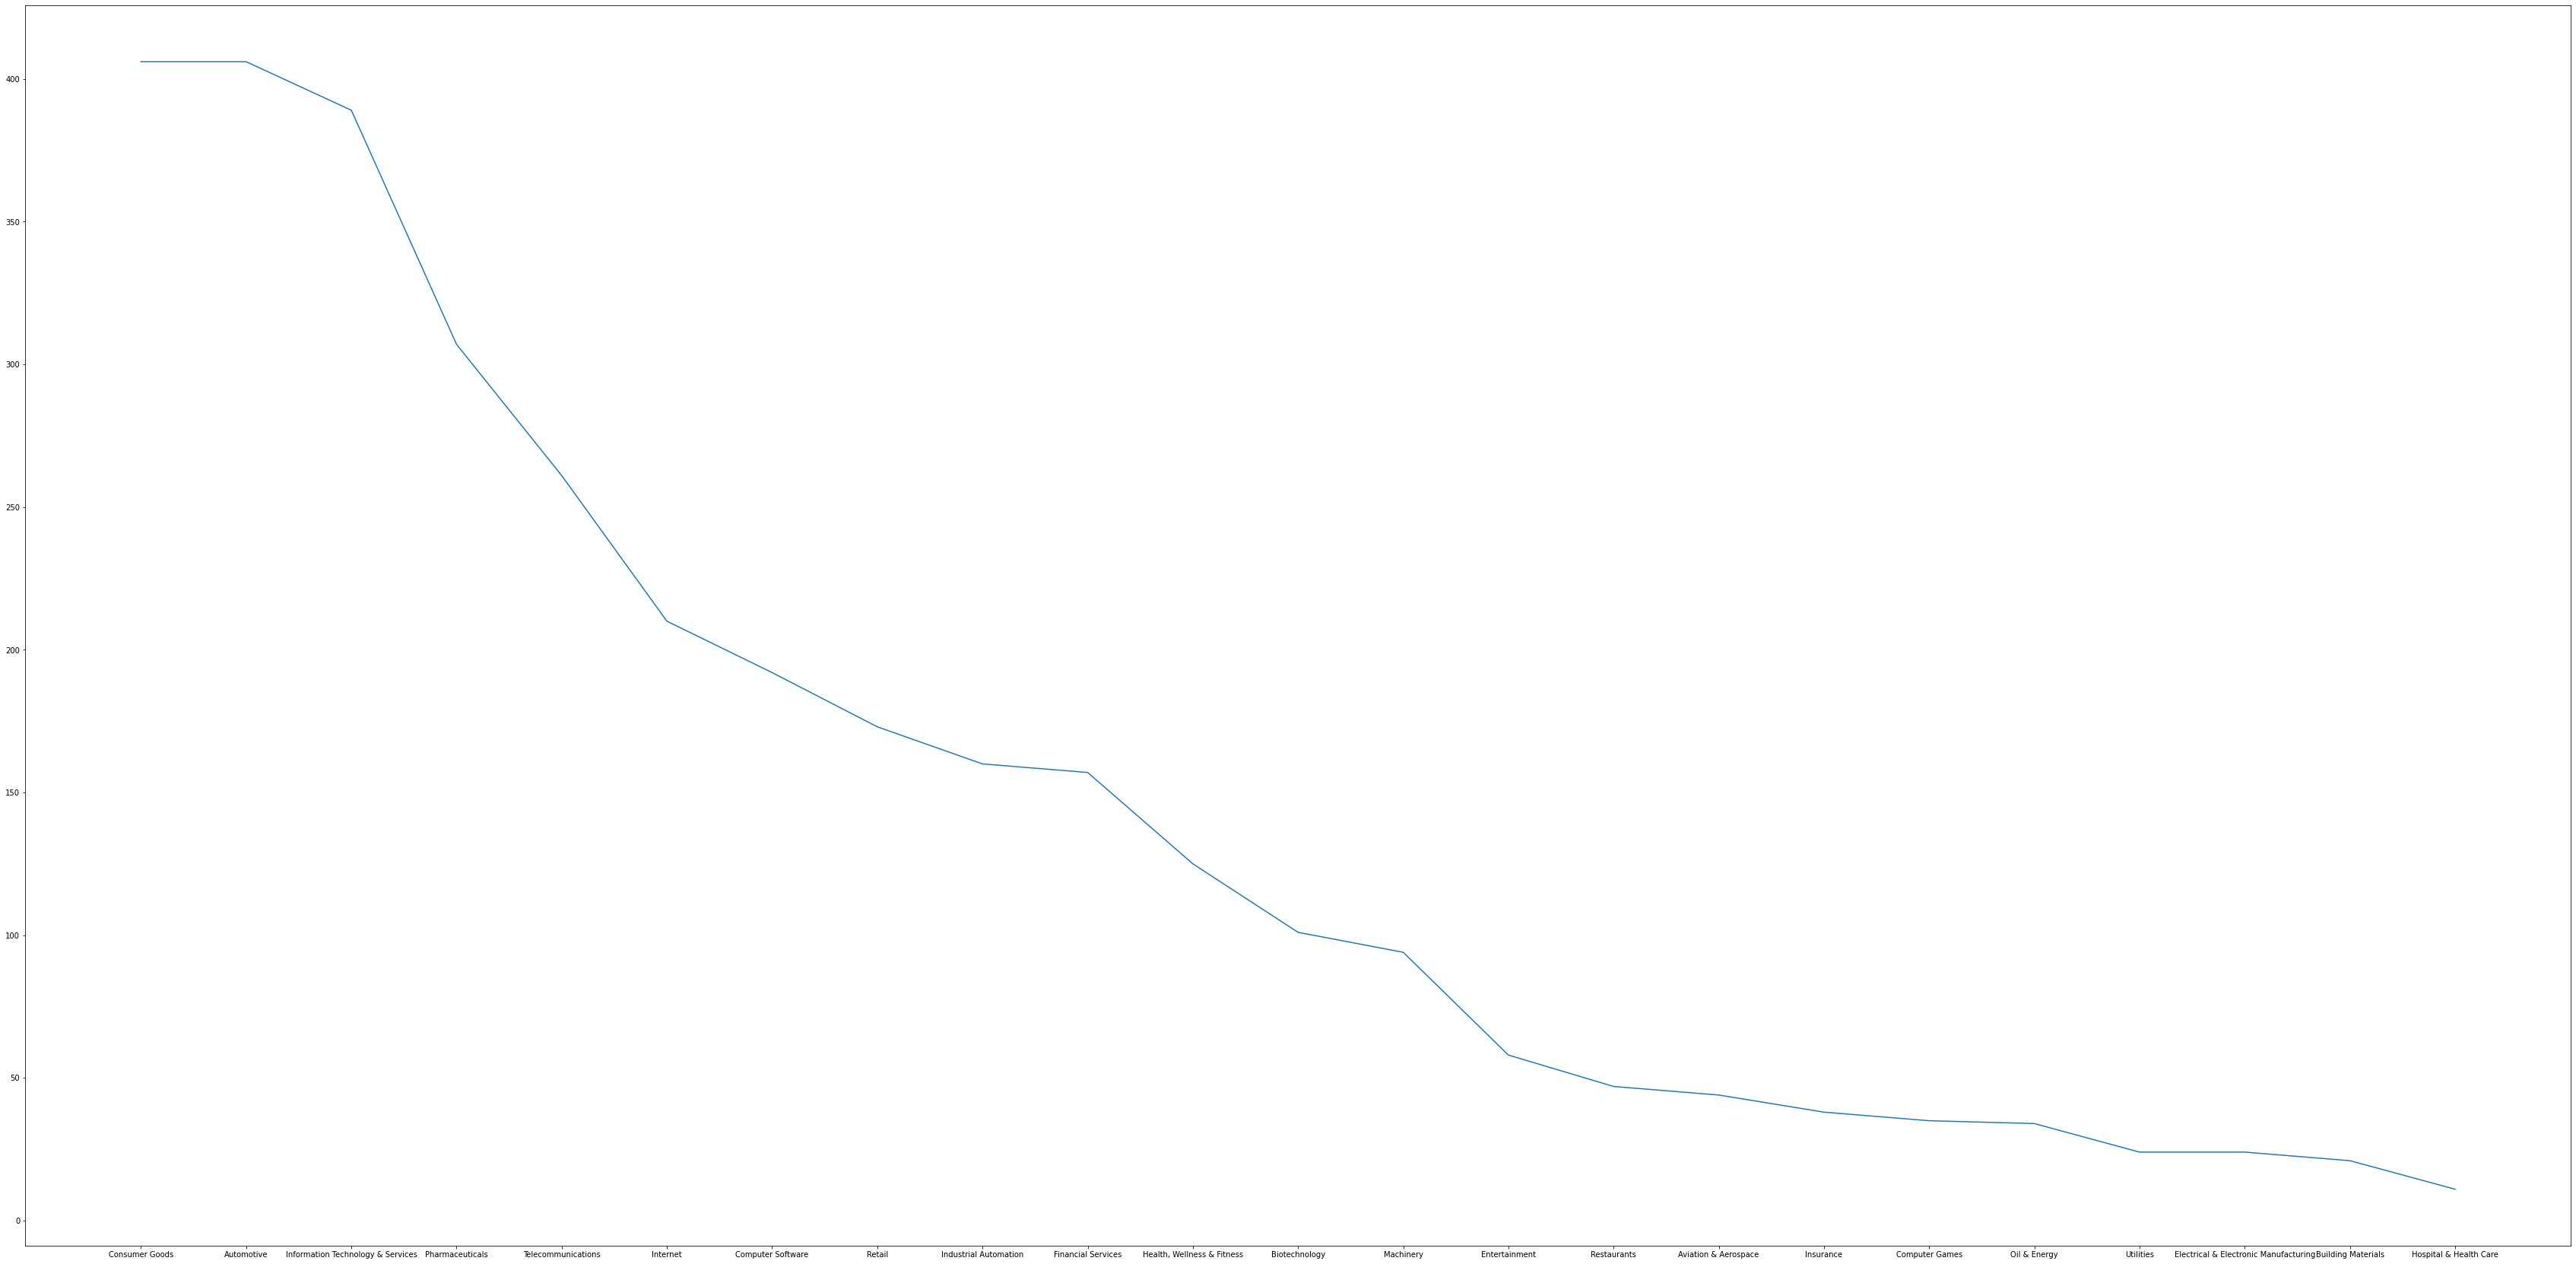

In [441]:
plt.plot(x,y)

In [427]:
california.groupby(by='name').mean()

,followers,num_hashtags,hashtag_followers,reactions,comments,media
name,,,,,,
"American Honda Motor Company, Inc.",219092.0,0.513889,0.0,380.250000,8.916667,1.0
Charles Schwab,198597.0,0.372549,0.0,90.686275,1.294118,1.0
Chevron,3193017.0,0.352941,0.0,1495.941176,53.882353,1.0
Electronic Arts (EA),744976.0,1.571429,0.0,546.742857,17.657143,1.0
Kia Motors America,91939.0,0.928571,0.0,218.000000,5.571429,1.0
Salesforce,2607160.0,0.987654,0.0,218.697531,19.814815,1.0
Uber,1777648.0,1.200000,0.0,767.800000,41.200000,1.0
VMware,1376184.0,0.725000,0.0,40.525000,0.175000,1.0
eBay,463433.0,0.093023,0.0,135.116279,3.930233,1.0


In [443]:
california.head()

,headline,location,followers,connections,about,time_spent,content,num_hashtags,hashtag_followers,reactions,comments,media
name,,,,,,,,,,,,
"American Honda Motor Company, Inc.",Automotive,"Torrance, CA",219092.0,"8,427","American Honda Motor Company, Inc., is a North...",3 months ago,The all-new Civic has taken shape. Available l...,0,0,600,34,1.0
"American Honda Motor Company, Inc.",Automotive,"Torrance, CA",219092.0,"8,427","American Honda Motor Company, Inc., is a North...",21 hours ago,"Hear from today’s Black history makers, risk t...",1,0,84,1,1.0
"American Honda Motor Company, Inc.",Automotive,"Torrance, CA",219092.0,"8,427","American Honda Motor Company, Inc., is a North...",1 week ago,Rise to the challenge in the redesigned Ridgel...,0,0,359,11,1.0
"American Honda Motor Company, Inc.",Automotive,"Torrance, CA",219092.0,"8,427","American Honda Motor Company, Inc., is a North...",1 month ago,'Tis the season of giving! After winning a new...,2,0,165,5,1.0
"American Honda Motor Company, Inc.",Automotive,"Torrance, CA",219092.0,"8,427","American Honda Motor Company, Inc., is a North...",1 month ago,Tim’s Honda Pilot helped keep him safe during ...,1,0,363,9,1.0


In [432]:
x1 = california['location']
y2 = california['followers']

<BarContainer object of 456 artists>

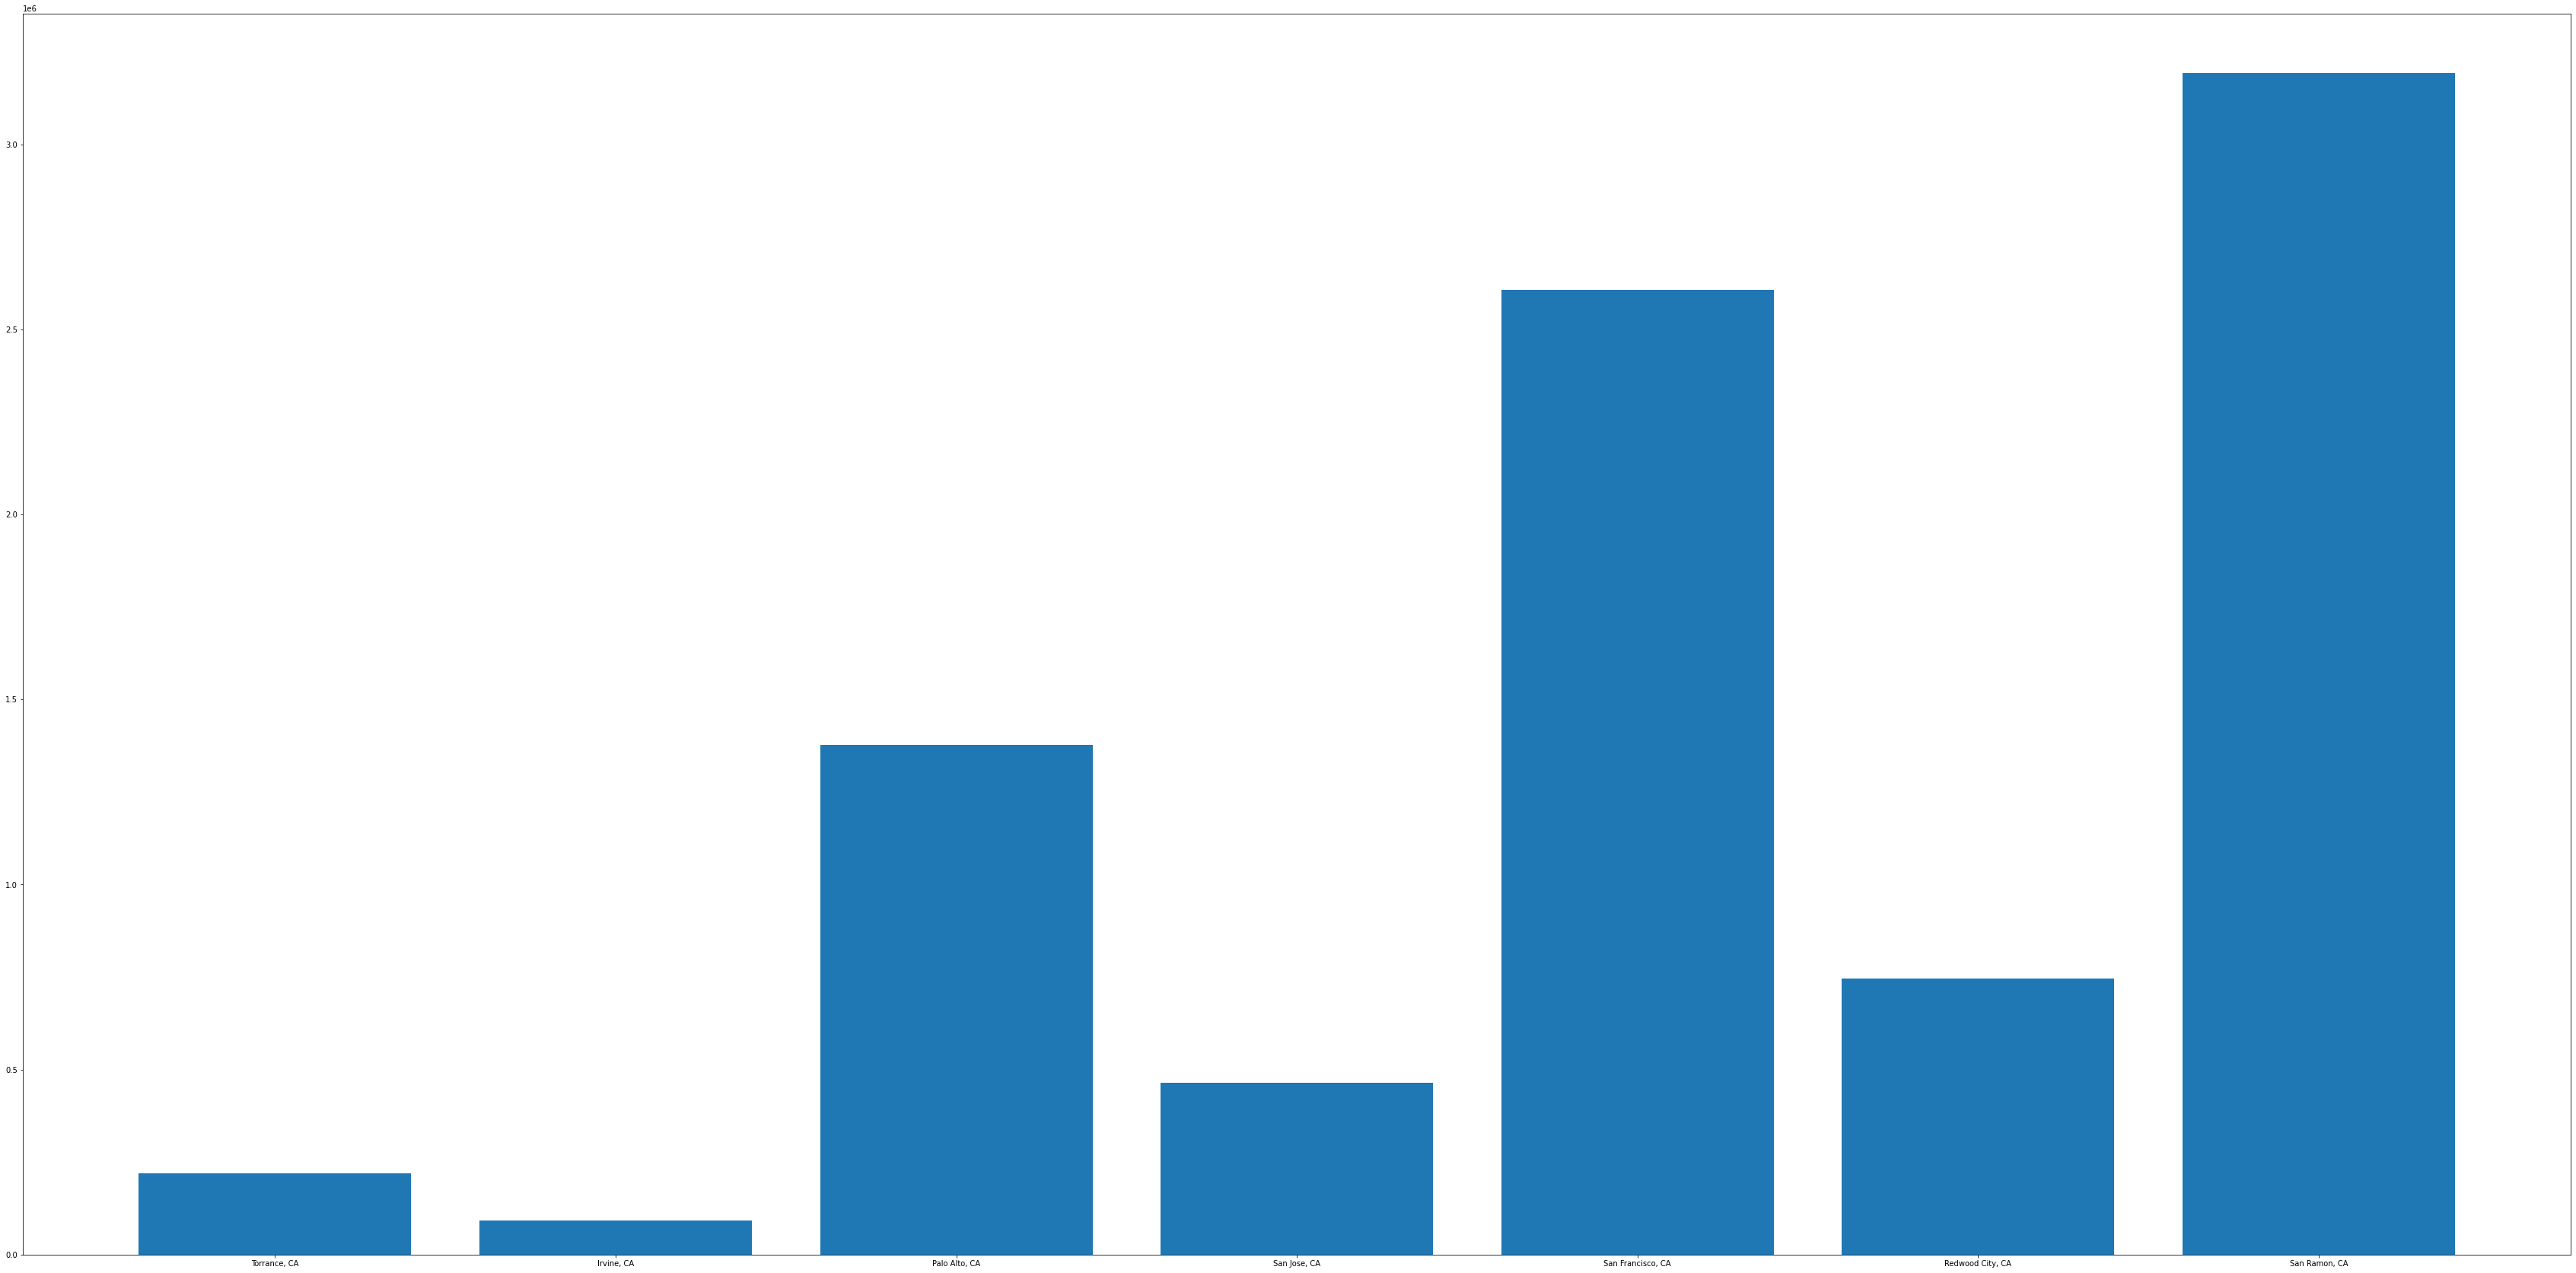

In [442]:
plt.bar(x1,y2)

In [296]:
X = pd.DataFrame(data = dumdf, columns ={
       'num_hashtags', 'hashtag_followers', 'reactions', 'comments', 'media',
       'location_Amsterdam, Noord-Holland', 'location_Atlanta, GA',
       'location_Bellevue, WA', 'location_Blackfriars, London',
       'location_Bloomfield, CT', 'location_Brookfield, Wisconsin',
       'location_Cambridge, MA', 'location_Charlotte, North Carolina',
       'location_Chicago, IL', 'location_Chicago, Illinois',
       'location_Cincinnati, Ohio', 'location_Columbus, GA',
       'location_Dallas, TX', 'location_Darmstadt',
       'location_Dearborn, Michigan', 'location_Deerfield, IL',
       'location_Irvine, CA', 'location_Kolkata, West Bengal',
       'location_London', 'location_Moline, IL', 'location_Munich',
       'location_New York, NY', 'location_New York, New York',
       'location_Palm Beach Gardens, Florida', 'location_Palo Alto, CA',
       'location_Redwood City, CA', 'location_Richfield, Minnesota',
       'location_Round Rock, Texas', 'location_San Francisco, CA',
       'location_San Jose, CA', 'location_San Jose, California',
       'location_San Ramon, CA', 'location_Shenzhen, Guangdong',
       'location_Teaneck, New Jersey', 'location_Torrance, CA',
       'location_Walldorf, BW', 'location_Welwyn Garden City, Hertfordshire',
       'location_Wolfsburg, Niedersachsen', 'headline_Automotive',
       'headline_Aviation & Aerospace', 'headline_Biotechnology',
       'headline_Building Materials', 'headline_Computer Games',
       'headline_Computer Software', 'headline_Consumer Goods',
       'headline_Electrical & Electronic Manufacturing',
       'headline_Entertainment', 'headline_Financial Services',
       'headline_Health, Wellness & Fitness',
       'headline_Hospital & Health Care', 'headline_Industrial Automation',
       'headline_Information Technology & Services', 'headline_Insurance',
       'headline_Internet', 'headline_Machinery', 'headline_Oil & Energy',
       'headline_Pharmaceuticals', 'headline_Restaurants', 'headline_Retail',
       'headline_Telecommunications', 'headline_Utilities'})
X.head()

,headline_Electrical & Electronic Manufacturing,"location_New York, New York",headline_Information Technology & Services,headline_Industrial Automation,headline_Utilities,headline_Machinery,comments,"location_San Jose, CA",num_hashtags,headline_Retail,...,hashtag_followers,"location_Dearborn, Michigan",location_London,headline_Computer Software,headline_Telecommunications,location_Munich,"location_Columbus, GA","location_Teaneck, New Jersey",location_Darmstadt,"location_New York, NY"
name,,,,,,,,,,,,,,,,,,,,,
Dell Technologies,0,0,1,0,0,0,577,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Dell Technologies,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dell Technologies,0,0,1,0,0,0,6,0,3,0,...,0,0,0,0,0,0,0,0,0,0
Dell Technologies,0,0,1,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Dell Technologies,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [297]:
Y = pd.DataFrame(data = df.followers)
Y.head()

,followers
name,
Dell Technologies,3597845.0
Dell Technologies,3597845.0
Dell Technologies,3597845.0
Dell Technologies,3597845.0
Dell Technologies,3597845.0


In [298]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [300]:
model1=KNeighborsClassifier(5)
model1.fit(X_train, Y_train)
model2=LogisticRegression()
model2.fit(X_train, Y_train)
model3=SVC(gamma=0.005)
model3.fit(X_train, Y_train)

/Users/Home/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Home/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/Home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

SVC(gamma=0.005)

In [301]:
from sklearn.metrics import accuracy_score
print("k-nearest neighbor: ", accuracy_score(Y_test, model1.predict(X_test)))
print("logistic regression: ", accuracy_score(Y_test, model2.predict(X_test)))
print("support vector machine: ", accuracy_score(Y_test, model3.predict(X_test)))

k-nearest neighbor:  0.20381526104417672
logistic regression:  0.07228915662650602
support vector machine:  0.17670682730923695


In [302]:
model2.coef_

array([[-2.22879534e-07, -2.76267697e-05, -5.17307590e-05, ...,
        -8.51536341e-06, -2.08284785e-05, -2.50501536e-06],
       [-1.08881421e-06,  9.35889510e-04, -1.17511587e-04, ...,
        -1.93730597e-05, -4.41571074e-05, -6.95744906e-06],
       [-5.27271905e-07, -5.75045401e-05, -9.36785484e-05, ...,
        -1.56163792e-05, -3.65008911e-05, -5.15347539e-06],
       ...,
       [-1.04443455e-05, -2.15188340e-04, -2.14477528e-04, ...,
        -3.30306909e-05, -6.81567780e-05, -1.58157263e-05],
       [-2.54585837e-05, -3.18466612e-04, -2.46331426e-04, ...,
        -3.62416367e-05, -7.64791565e-05, -2.15252373e-05],
       [-2.41658329e-05, -3.18738684e-04, -2.79685406e-04, ...,
        -5.50144358e-05, -7.51244696e-05, -2.03757186e-05]])

In [303]:
model2.intercept_

array([-2.58885793e-04,  3.19358324e-04, -2.04504048e-04, -4.55287278e-04,
        2.15346640e-05, -3.14131792e-04,  4.26806580e-04, -1.44956685e-04,
        3.98030599e-04,  1.36556726e-03, -2.22524909e-04, -3.75418083e-04,
       -1.55187799e-04,  2.60779715e-04,  1.99851207e-04, -9.48900879e-04,
        1.48147028e-03, -7.75435534e-04, -2.83610856e-04, -6.46946883e-04,
       -1.19800483e-03, -5.22970289e-04, -9.43152679e-04,  3.85917597e-04,
       -9.99117431e-04,  4.82600773e-04,  1.73946845e-03,  3.84944624e-04,
       -5.37535584e-04, -6.03776631e-04, -4.57948658e-04, -1.20423907e-03,
       -1.90488018e-03,  1.10464963e-03, -1.27792308e-04,  1.52956867e-03,
       -1.83963995e-03, -1.54010664e-03,  2.94233762e-04,  1.56592748e-03,
        1.65748900e-03,  4.85532595e-04,  2.03078805e-03,  1.08369878e-03,
       -5.53263250e-04])

In [304]:
Y_pred = model2.predict(X_test)

In [305]:
from sklearn import metrics 

In [306]:
metrics.mean_squared_error(Y_test,Y_pred)

7571292983467.432

In [363]:
X1 = pd.DataFrame(data = dumdf, columns ={'num_hashtags', 'hashtag_followers', 'reactions', 'comments', 'media'})
X1.head()

,reactions,hashtag_followers,comments,num_hashtags,media
name,,,,,
Dell Technologies,1217,0,577,2,1.0
Dell Technologies,195,0,2,0,1.0
Dell Technologies,250,0,6,3,1.0
Dell Technologies,167,0,3,1,1.0
Dell Technologies,178,0,0,0,1.0


In [364]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.3)

In [365]:
model11=KNeighborsClassifier(5)
model11.fit(X1_train, Y_train)
model22=LogisticRegression()
model22.fit(X1_train, Y_train)
model33=SVC(gamma=0.005)
model33.fit(X1_train, Y_train)

/Users/Home/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Home/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/Home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

SVC(gamma=0.005)

In [366]:
from sklearn.metrics import accuracy_score
print("k-nearest neighbor: ", accuracy_score(Y_test, model11.predict(X1_test)))
print("logistic regression: ", accuracy_score(Y_test, model22.predict(X1_test)))
print("support vector machine: ", accuracy_score(Y_test, model33.predict(X1_test)))

k-nearest neighbor:  0.11646586345381527
logistic regression:  0.06224899598393574
support vector machine:  0.1285140562248996


In [367]:
model22.coef_

array([[-2.49702080e-03,  0.00000000e+00, -4.89071611e-04,
         1.93081972e-04,  2.97105736e-04],
       [-3.27110267e-03,  0.00000000e+00,  1.27636017e-05,
        -4.37565069e-04, -1.56666866e-04],
       [-5.73585112e-04,  0.00000000e+00, -1.58999969e-03,
        -8.99350715e-04, -3.05391237e-04],
       [-5.66399242e-03,  0.00000000e+00, -4.36938542e-04,
         5.05877604e-05, -2.33552355e-05],
       [-3.17372344e-03,  0.00000000e+00, -3.50703547e-04,
        -6.17239679e-04, -2.16034587e-04],
       [-3.26692695e-03,  0.00000000e+00, -7.24181918e-04,
        -5.79116615e-04,  3.26312508e-04],
       [ 1.29277374e-03,  0.00000000e+00, -2.36428623e-03,
        -1.61772551e-03, -1.67487579e-04],
       [ 1.50349162e-03,  0.00000000e+00,  3.66091726e-03,
         4.25364219e-03,  2.04883266e-04],
       [-2.17575283e-04,  0.00000000e+00, -8.46076176e-04,
         8.28216357e-04,  7.95997902e-04],
       [-3.26575917e-03,  0.00000000e+00, -4.83774825e-04,
        -3.34292975e-04

In [417]:
X2 = pd.DataFrame(data = dumdf, columns ={'hashtag_followers','media',
                                         'headline_Automotive',
       'headline_Computer Software', 'headline_Consumer Goods', 'headline_Financial Services',
       'headline_Health, Wellness & Fitness',
       'headline_Information Technology & Services',
       'headline_Internet',
       'headline_Pharmaceuticals', 'headline_Retail',
       'headline_Telecommunications','headline_Industrial Automation'})
X2.head()

,headline_Information Technology & Services,headline_Internet,headline_Automotive,hashtag_followers,headline_Financial Services,headline_Industrial Automation,headline_Computer Software,headline_Telecommunications,headline_Pharmaceuticals,headline_Retail,"headline_Health, Wellness & Fitness",media,headline_Consumer Goods
name,,,,,,,,,,,,,
Dell Technologies,1,0,0,0,0,0,0,0,0,0,0,1.0,0
Dell Technologies,1,0,0,0,0,0,0,0,0,0,0,1.0,0
Dell Technologies,1,0,0,0,0,0,0,0,0,0,0,1.0,0
Dell Technologies,1,0,0,0,0,0,0,0,0,0,0,1.0,0
Dell Technologies,1,0,0,0,0,0,0,0,0,0,0,1.0,0


In [418]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.3)

In [419]:
model111=KNeighborsClassifier(5)
model111.fit(X2_train, Y_train)
model222=LogisticRegression()
model222.fit(X2_train, Y_train)
model333=SVC(gamma=0.005)
model333.fit(X2_train, Y_train)

/Users/Home/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Home/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/Home/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

SVC(gamma=0.005)

In [420]:
from sklearn.metrics import accuracy_score
print("k-nearest neighbor: ", accuracy_score(Y_test, model111.predict(X2_test)))
print("logistic regression: ", accuracy_score(Y_test, model222.predict(X2_test)))
print("support vector machine: ", accuracy_score(Y_test, model333.predict(X2_test)))

k-nearest neighbor:  0.46887550200803213
logistic regression:  0.5411646586345381
support vector machine:  0.48092369477911645


In [421]:
model222.coef_

array([[-5.59100805e-02, -3.13887800e-02,  7.92270882e-01,
         0.00000000e+00, -3.56488879e-02, -1.28709330e-02,
        -2.46997541e-02, -2.67570285e-02, -2.80160055e-02,
        -2.95336711e-02, -1.24817039e-02, -8.73328946e-03,
        -4.40372499e-02],
       [-1.17338968e+00, -8.69952456e-01, -1.43644459e+00,
         0.00000000e+00, -9.35036864e-01, -5.01565146e-01,
        -7.59188583e-01, -7.93766129e-01, -8.13930256e-01,
        -8.42212691e-01, -4.92196493e-01, -9.89154756e-04,
        -1.03995741e+00],
       [-1.91797552e-01, -1.13644042e-01,  3.06358701e+00,
         0.00000000e+00, -1.28312475e-01, -4.84261065e-02,
        -9.08044984e-02, -9.75894547e-02, -1.01651860e-01,
        -1.07504659e-01, -4.71249837e-02,  7.14230023e-05,
        -1.54486545e-01],
       [-6.88782142e-01, -4.69279186e-01, -8.93148959e-01,
         0.00000000e+00, -5.14259126e-01, -2.35629711e-01,
        -3.94375499e-01, -4.17295621e-01, -4.30825966e-01,
        -4.50065870e-01, -2.30311553e